In [2]:
# install.packages("iml")
# install.packages("randomForest")
# install.packages("partykit")
# install.packages("patchwork")

library(iml)
library(randomForest)
library(partykit)
library(patchwork)


also installing the dependencies ‘checkmate’, ‘Formula’, ‘Metrics’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘libcoin’, ‘mvtnorm’, ‘inum’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



In [7]:
carros <- read.csv("../data/carros.csv", sep = ";", encoding = "UTF-8")

head(carros)


,Consumo,Cilindros,Cilindradas,RelEixoTraseiro,Peso,Tempo,TipoMotor,Transmissao,Marchas,Carburadors,HP
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,21,6,160,39,262,1646,0,1,4,4,110
2,21,6,160,39,2875,1702,0,1,4,4,110
3,228,4,108,385,232,1861,1,1,4,1,93
4,214,6,258,308,3215,1944,1,0,3,1,110
5,187,8,360,315,344,1702,0,0,3,2,175
6,181,6,225,276,346,2022,1,0,3,1,105


In [8]:
modelo <- randomForest(HP ~ ., data = carros, ntree = 1000)

# carros[, -11] é o dataset sem a variável HP
previsor <- Predictor$new(modelo, carros[, -11], y = carros$HP)


In [9]:
importancia <- FeatureImp$new(previsor, loss = "mse")

importancia$results


feature,importance.05,importance,importance.95,permutation.error
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Cilindros,4.733642,5.011831,6.263480,1478.9407
TipoMotor,1.927662,2.515113,2.937435,742.1846
Consumo,2.321136,2.438502,2.986126,719.5772
Carburadors,2.230405,2.380533,2.810494,702.4713
RelEixoTraseiro,1.638114,1.722419,1.788669,508.2685
Tempo,1.392952,1.431352,1.453799,422.3774
Marchas,1.270039,1.383813,1.457586,408.3493
Cilindradas,1.277411,1.345361,1.392520,397.0026
Peso,1.161158,1.193394,1.267245,352.1584


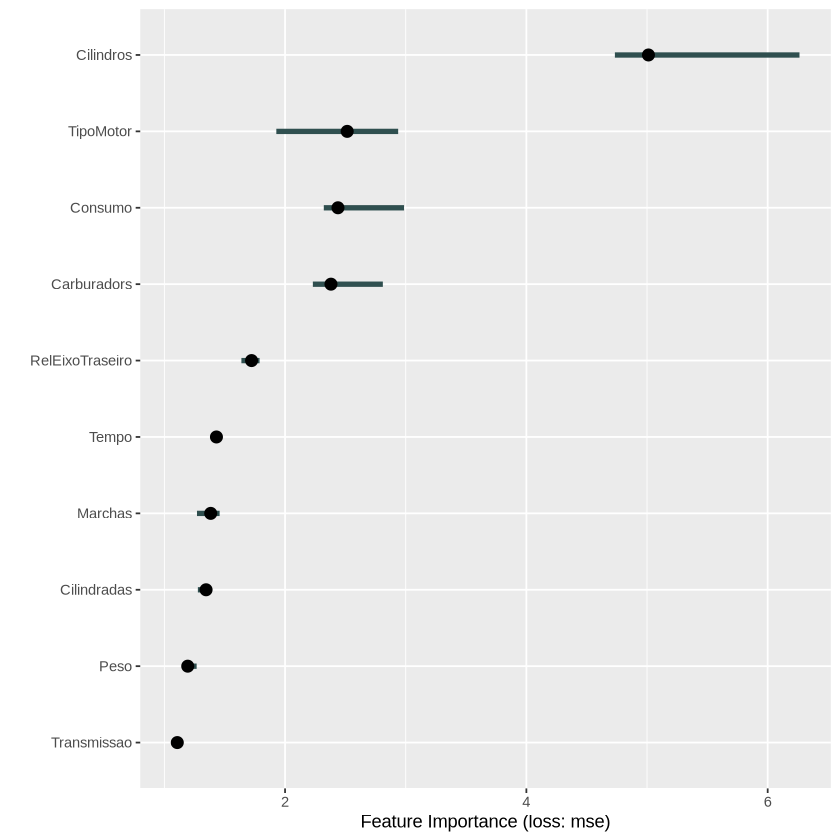

In [11]:
importancia$plot(type = "bar", order = TRUE)
